In [1]:
import pandas as pd
import numpy as np
import re
import nltk 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Load the dataset and select the columns to analyze
data = pd.read_csv('C:/Users/CPE/Desktop/Tweet/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None, 
                   names=['target', 'id', 'date', 'flag', 'user', 'text'])

In [3]:
data

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
# Replace missing data with NaN values
data.replace(to_replace='None', value=np.nan, inplace=True)

In [5]:
#Count NaN value
data.isna().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [6]:
# Change text to all lowercase
data['text'] = data['text'].str.lower()

In [7]:
data

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up. having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb.com - very cool to hear old walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover? ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday to my boo of alll time!!! ...


In [8]:
#Remove noise , URL from the text except for hashtags (#) and at (@) 
def remove_noise(text):
    text = re.sub(r'[^a-zA-Z0-9\s#@]', '', text)
    text = re.sub(r'http\S+', '', text)
    text = text.encode('ascii', 'ignore').decode('ascii')
    return text

In [9]:
data['text2'] = data['text'].apply(remove_noise)

In [10]:
data

,target,id,date,flag,user,text,text2
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t...",@switchfoot awww thats a bummer you shoulda...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...,@kenichan i dived many times for the ball mana...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",@nationwideclass no its not behaving at all im...
...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up. having no school is the best fee...,just woke up having no school is the best feel...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb.com - very cool to hear old walt interv...,thewdbcom very cool to hear old walt intervie...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover ask me fo...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time tup...


In [11]:
# Remove words starting with '@'
def remove_at(tokens):
    filtered_tokens = [token for token in tokens if not token.startswith('@')]
    return filtered_tokens
data['text2'] = data['text2'].apply(lambda x: ' '.join(remove_at(x.split())))
data

,target,id,date,flag,user,text,text2
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t...",awww thats a bummer you shoulda got david carr...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...,i dived many times for the ball managed to sav...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...
...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up. having no school is the best fee...,just woke up having no school is the best feel...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb.com - very cool to hear old walt interv...,thewdbcom very cool to hear old walt interviews
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover ask me fo...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time tup...


In [12]:
# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
data['text2'] = data['text2'].apply(remove_emoji)
data

,target,id,date,flag,user,text,text2
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t...",awww thats a bummer you shoulda got david carr...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...,i dived many times for the ball managed to sav...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...
...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up. having no school is the best fee...,just woke up having no school is the best feel...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb.com - very cool to hear old walt interv...,thewdbcom very cool to hear old walt interviews
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover ask me fo...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time tup...


In [13]:
# Remove hashtag (#)
def remove_hashtags(text):
    filtered_text = [word for word in text.split() if not word.startswith('#')]
    return ' '.join(filtered_text)

In [14]:
# Remove hashtag (#) from column 'text2' 
data['text2'] = data['text2'].apply(remove_hashtags)
data

,target,id,date,flag,user,text,text2
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t...",awww thats a bummer you shoulda got david carr...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...,i dived many times for the ball managed to sav...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...
...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up. having no school is the best fee...,just woke up having no school is the best feel...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb.com - very cool to hear old walt interv...,thewdbcom very cool to hear old walt interviews
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover ask me fo...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time tup...


In [15]:
import nltk
nltk.download('words')
from nltk.corpus import words

english_words = set(words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\CPE\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [16]:
# Remove text that non-english words
def remove_non_english_words(text2):
    words = text2.split()
    filtered_words = [word for word in words if word.lower() in english_words]
    return ' '.join(filtered_words)

In [17]:
data['text3'] = data['text2'].apply(remove_non_english_words)

In [18]:
data

,target,id,date,flag,user,text,text2,text3
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t...",awww thats a bummer you shoulda got david carr...,thats a bummer you got carr of third day to do...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...,is upset that he cant update his by it and mig...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...,i dived many times for the ball managed to sav...,i many times for the ball to save the rest go ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,no its not at all mad why am i here because i ...
...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up. having no school is the best fee...,just woke up having no school is the best feel...,just woke up no school is the best feeling ever
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb.com - very cool to hear old walt interv...,thewdbcom very cool to hear old walt interviews,very cool to hear old walt
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover ask me fo...,are you ready for your mojo ask me for
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time tup...,happy birthday to my boo of time


In [19]:
# Use regular expressions to select hashtag data from column 'text' and store it in a new column
def extract_hashtags(text):
    hashtags = re.findall(r'#\w+', text)
    return " ".join(hashtags)
data['hashtags'] = data['text'].apply(extract_hashtags)
data

,target,id,date,flag,user,text,text2,text3,hashtags
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t...",awww thats a bummer you shoulda got david carr...,thats a bummer you got carr of third day to do...,
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...,is upset that he cant update his by it and mig...,
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...,i dived many times for the ball managed to sav...,i many times for the ball to save the rest go ...,
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body itchy and like its on fire,
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,no its not at all mad why am i here because i ...,
...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up. having no school is the best fee...,just woke up having no school is the best feel...,just woke up no school is the best feeling ever,
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb.com - very cool to hear old walt interv...,thewdbcom very cool to hear old walt interviews,very cool to hear old walt,
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover ask me fo...,are you ready for your mojo ask me for,
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time tup...,happy birthday to my boo of time,


In [20]:
import nltk

In [21]:
# Extract the text into word tokens and store them in a new column
from nltk.tokenize import word_tokenize
nltk.download('punkt')
data['text3'].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CPE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0          [thats, a, bummer, you, got, carr, of, third, ...
1          [is, upset, that, he, cant, update, his, by, i...
2          [i, many, times, for, the, ball, to, save, the...
3          [my, whole, body, itchy, and, like, its, on, f...
4          [no, its, not, at, all, mad, why, am, i, here,...
                                 ...                        
1599995    [just, woke, up, no, school, is, the, best, fe...
1599996                    [very, cool, to, hear, old, walt]
1599997     [are, you, ready, for, your, mojo, ask, me, for]
1599998             [happy, birthday, to, my, boo, of, time]
1599999                                              [happy]
Name: text3, Length: 1600000, dtype: object

In [22]:
data['tokens'] = data['text3'].apply(word_tokenize)

In [24]:
data

,target,id,date,flag,user,text,text2,text3,hashtags,tokens
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t...",awww thats a bummer you shoulda got david carr...,thats a bummer you got carr of third day to do...,,"[thats, a, bummer, you, got, carr, of, third, ..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...,is upset that he cant update his by it and mig...,,"[is, upset, that, he, cant, update, his, by, i..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...,i dived many times for the ball managed to sav...,i many times for the ball to save the rest go ...,,"[i, many, times, for, the, ball, to, save, the..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body itchy and like its on fire,,"[my, whole, body, itchy, and, like, its, on, f..."
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,no its not at all mad why am i here because i ...,,"[no, its, not, at, all, mad, why, am, i, here,..."
...,...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up. having no school is the best fee...,just woke up having no school is the best feel...,just woke up no school is the best feeling ever,,"[just, woke, up, no, school, is, the, best, fe..."
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb.com - very cool to hear old walt interv...,thewdbcom very cool to hear old walt interviews,very cool to hear old walt,,"[very, cool, to, hear, old, walt]"
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover ask me fo...,are you ready for your mojo ask me for,,"[are, you, ready, for, your, mojo, ask, me, for]"
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time tup...,happy birthday to my boo of time,,"[happy, birthday, to, my, boo, of, time]"


In [23]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CPE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Remove stopwords
def remove_stopwords(tokens):
  return [t for t in tokens if t not in stopwords]
data['tokens_remove_stopwords'] = data['tokens'].apply(remove_stopwords)

In [27]:
data

,target,id,date,flag,user,text,text2,text3,hashtags,tokens,tokens_remove_stopwords
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t...",awww thats a bummer you shoulda got david carr...,thats a bummer you got carr of third day to do...,,"[thats, a, bummer, you, got, carr, of, third, ...","[thats, bummer, got, carr, third, day]"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...,is upset that he cant update his by it and mig...,,"[is, upset, that, he, cant, update, his, by, i...","[upset, cant, update, might, cry, result, scho..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...,i dived many times for the ball managed to sav...,i many times for the ball to save the rest go ...,,"[i, many, times, for, the, ball, to, save, the...","[many, times, ball, save, rest, go]"
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body itchy and like its on fire,,"[my, whole, body, itchy, and, like, its, on, f...","[whole, body, itchy, like, fire]"
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,no its not at all mad why am i here because i ...,,"[no, its, not, at, all, mad, why, am, i, here,...","[mad, cant, see]"
...,...,...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up. having no school is the best fee...,just woke up having no school is the best feel...,just woke up no school is the best feeling ever,,"[just, woke, up, no, school, is, the, best, fe...","[woke, school, best, feeling, ever]"
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb.com - very cool to hear old walt interv...,thewdbcom very cool to hear old walt interviews,very cool to hear old walt,,"[very, cool, to, hear, old, walt]","[cool, hear, old, walt]"
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover ask me fo...,are you ready for your mojo ask me for,,"[are, you, ready, for, your, mojo, ask, me, for]","[ready, mojo, ask]"
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time tup...,happy birthday to my boo of time,,"[happy, birthday, to, my, boo, of, time]","[happy, birthday, boo, time]"


In [25]:
# Count stopwords
data['length_1'] = data['tokens_remove_stopwords'].apply(len)

In [26]:
data['tokens_remove_stopwords']

0                     [thats, bummer, got, carr, third, day]
1          [upset, cant, update, might, cry, result, scho...
2                        [many, times, ball, save, rest, go]
3                           [whole, body, itchy, like, fire]
4                                           [mad, cant, see]
                                 ...                        
1599995                  [woke, school, best, feeling, ever]
1599996                              [cool, hear, old, walt]
1599997                                   [ready, mojo, ask]
1599998                         [happy, birthday, boo, time]
1599999                                              [happy]
Name: tokens_remove_stopwords, Length: 1600000, dtype: object

In [27]:
# Lecture 
# text = text pure no clean
# text2 = text that cleaned (clean noise, URL, emoji, @account (@), hashtag (#))
# text3 = text2 but remove the words that non-english words (I use this column to tokenize and remove stopword)
data

,target,id,date,flag,user,text,text2,text3,hashtags,tokens,tokens_remove_stopwords,length_1
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t...",awww thats a bummer you shoulda got david carr...,thats a bummer you got carr of third day to do...,,"[thats, a, bummer, you, got, carr, of, third, ...","[thats, bummer, got, carr, third, day]",6
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...,is upset that he cant update his by it and mig...,,"[is, upset, that, he, cant, update, his, by, i...","[upset, cant, update, might, cry, result, scho...",10
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...,i dived many times for the ball managed to sav...,i many times for the ball to save the rest go ...,,"[i, many, times, for, the, ball, to, save, the...","[many, times, ball, save, rest, go]",6
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body itchy and like its on fire,,"[my, whole, body, itchy, and, like, its, on, f...","[whole, body, itchy, like, fire]",5
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,no its not at all mad why am i here because i ...,,"[no, its, not, at, all, mad, why, am, i, here,...","[mad, cant, see]",3
...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up. having no school is the best fee...,just woke up having no school is the best feel...,just woke up no school is the best feeling ever,,"[just, woke, up, no, school, is, the, best, fe...","[woke, school, best, feeling, ever]",5
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb.com - very cool to hear old walt interv...,thewdbcom very cool to hear old walt interviews,very cool to hear old walt,,"[very, cool, to, hear, old, walt]","[cool, hear, old, walt]",4
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover ask me fo...,are you ready for your mojo ask me for,,"[are, you, ready, for, your, mojo, ask, me, for]","[ready, mojo, ask]",3
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time tup...,happy birthday to my boo of time,,"[happy, birthday, to, my, boo, of, time]","[happy, birthday, boo, time]",4


In [29]:
df = pd.DataFrame(data)

In [53]:
#vectorizer = CountVectorizer()
#text_counts = vectorizer.fit_transform(data['text3'])

In [54]:
#print(text_counts.toarray())

In [32]:
df.isna().sum()

target                     0
id                         0
date                       0
flag                       0
user                       0
text                       0
text2                      0
text3                      0
hashtags                   0
tokens                     0
tokens_remove_stopwords    0
length_1                   0
dtype: int64

In [33]:
import regex as re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stopwords = set(nltk.corpus.stopwords.words('english'))

def tokenize(text):
  return re.findall(r'[|w-]*\p{L}[\w-]*', text)

def remove_stop(tokens):
  return [t for t in tokens if t.lower() not in stopwords]

pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
  tokens = text
  for transform in pipeline:
    tokens = transform(tokens)
  return tokens

def ngram(tokens, n=2, sep=' ', stopwords=set()):
  return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
    if len([t for t in ngram if t in stopwords])==0]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CPE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CPE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
df = pd.DataFrame({'text': df['text3']})
df['tokens'] = df['text'].apply(prepare, pipeline = pipeline)
df['bigrams'] = df['tokens'].apply(lambda x: [t for t in ngram(x, n = 2)])

In [36]:
from collections import Counter 

In [37]:
def count_words(df, column='bigrams', preprocess=None, min_freq = 2):

  def update(doc):
    tokens = doc if preprocess is None else preprocess(doc)
    counter.update(tokens)

  counter = Counter()
  df[column].map(update)

  freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
  freq_df = freq_df.query('freq >@min_freq')
  freq_df.index.name = 'token'
  return freq_df.sort_values('freq', ascending=False)

In [38]:
freq_df = count_words(df)
freq_df.head(5)

,freq
token,
cant wait,13310
last night,11845
good morning,9918
dont know,8382
wish could,6702


In [39]:
!pip install wordcloud

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

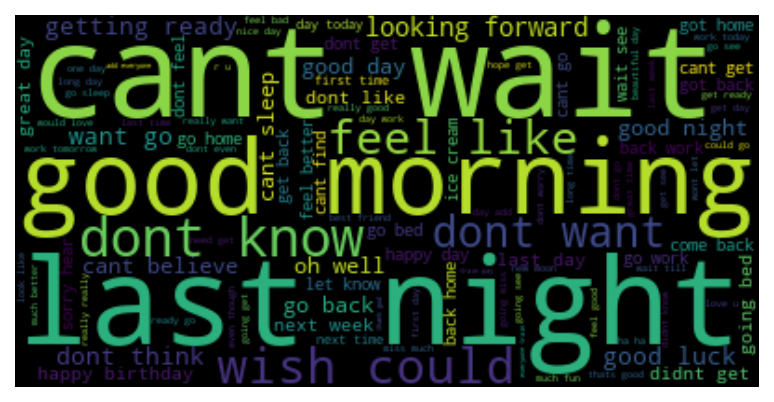

In [41]:
wc = WordCloud(max_words=100)
wc.generate_from_frequencies(freq_df['freq'])
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')